Missing Values per Column:
 Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

--- EXTRACTED RELATIONSHIPS ---
1. Spending Impact: High spenders get discounts 0.0% of the time vs 0.0% for low spenders.
2. Channel Impact: Online discount rate is 0.0%.


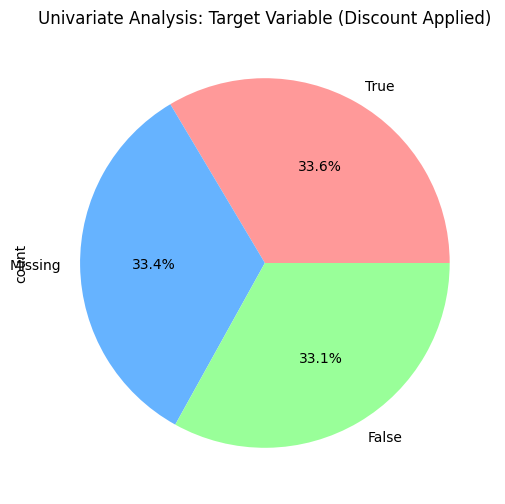

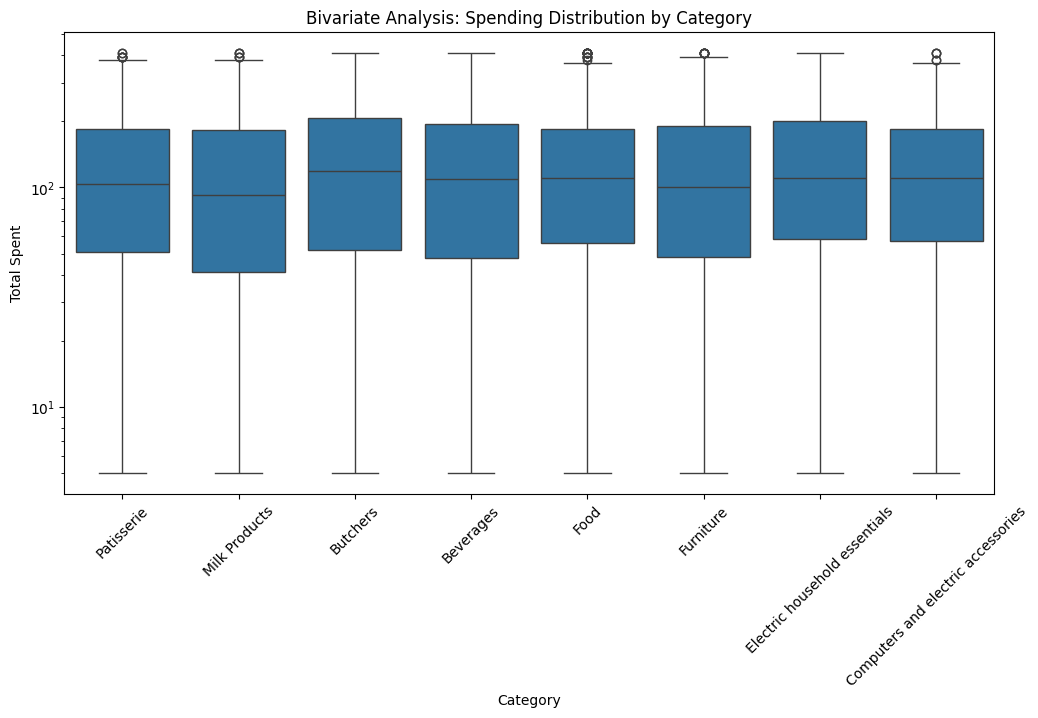

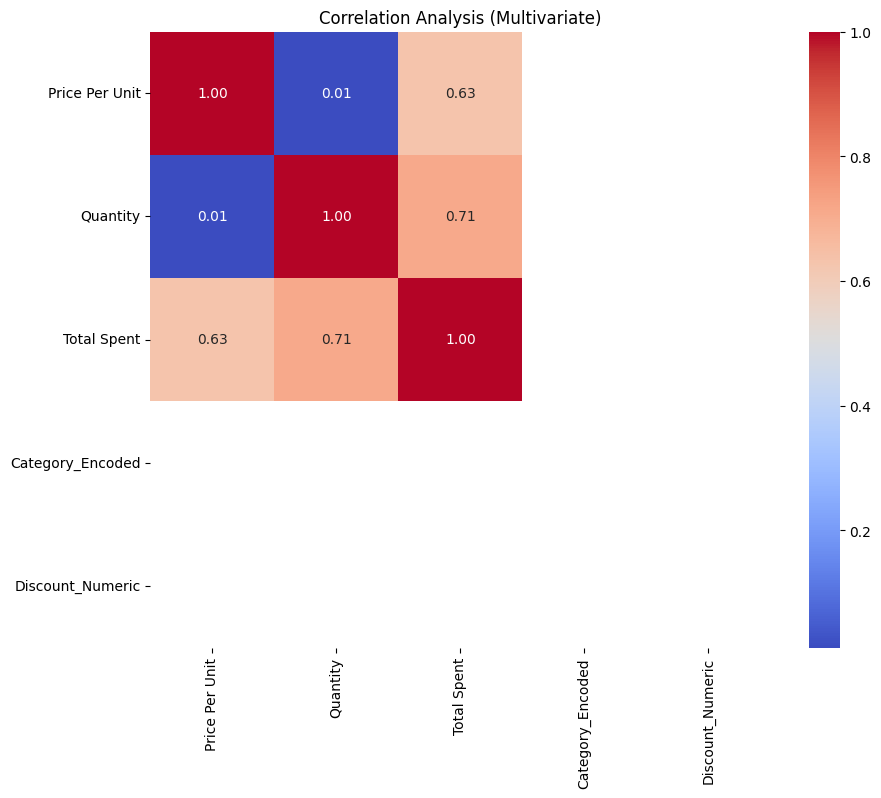

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('retail_store_sales.csv')

# --- 1. MISSING VALUE ANALYSIS ---
# Following the notebook's approach to identifying data gaps
missing_data = df.isnull().sum()
print("Missing Values per Column:\n", missing_data)

# --- 2. UNIVARIATE ANALYSIS (Target Variable) ---
# N-Classes Analysis for Imbalance (from your earlier request)
plt.figure(figsize=(8, 6))
df['Discount Applied'].fillna('Missing').value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Univariate Analysis: Target Variable (Discount Applied)')
plt.savefig('univariate_target.png')

# --- 3. BIVARIATE ANALYSIS (Categorical vs. Quantitative) ---
# Relationship: Category vs. Total Spent (Cleaning missing Spent first)
df['Total Spent'] = df['Total Spent'].fillna(df['Price Per Unit'] * df['Quantity'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Total Spent', data=df)
plt.xticks(rotation=45)
plt.title('Bivariate Analysis: Spending Distribution by Category')
plt.yscale('log') # Log scale to better visualize the range
plt.savefig('bivariate_cat_spent.png')

# --- 4. MULTIVARIATE ANALYSIS (Heatmap) ---
# Encoding as discussed to check relationships between all features
# Using Target Encoding for Category as per our chosen strategy
target_map = df.groupby('Category')['Discount Applied'].apply(lambda x: (x == 'True').mean())
df['Category_Encoded'] = df['Category'].map(target_map)
df['Discount_Numeric'] = df['Discount Applied'].map({'True': 1, 'False': 0})

plt.figure(figsize=(10, 8))
corr = df[['Price Per Unit', 'Quantity', 'Total Spent', 'Category_Encoded', 'Discount_Numeric']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Analysis (Multivariate)')
plt.savefig('multivariate_heatmap.png')

# --- 5. KEY RELATIONSHIP EXTRACTION ---
# Finding the most significant patterns
print("\n--- EXTRACTED RELATIONSHIPS ---")
# Relationship 1: Spending Thresholds
high_spend_discount = df[df['Total Spent'] > df['Total Spent'].median()]['Discount Applied'].value_counts(normalize=True).get('True', 0)
low_spend_discount = df[df['Total Spent'] <= df['Total Spent'].median()]['Discount Applied'].value_counts(normalize=True).get('True', 0)
print(f"1. Spending Impact: High spenders get discounts {high_spend_discount*100:.1f}% of the time vs {low_spend_discount*100:.1f}% for low spenders.")

# Relationship 2: Channel behavior
online_discount = df[df['Location'] == 'Online']['Discount Applied'].value_counts(normalize=True).get('True', 0)
print(f"2. Channel Impact: Online discount rate is {online_discount*100:.1f}%.")